## Gradient descent based learning

In [1]:
# 컴퓨터가 미분하는 방법
x=10
derivative=[]
y=[]
for i in range(100000):
    old_value=x
    y.append(old_value**2)
    derivative.append(old_value-0.01*2*old_value)
    x=old_value-0.01*2*old_value
    
x, y[-1]

(1.2e-322, 0.0)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

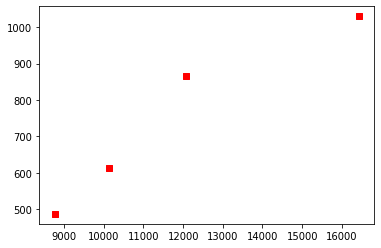

In [3]:
x_data = np.array([8759, 10132, 12078, 16430])
y_data = np.array([487, 612,866,1030])

plt.scatter(x_data, y_data, color='r', marker='s')
plt.show()

In [4]:
weight_0=np.random.sample(5)
weight_1=np.random.sample(5)

weight_0, weight_1

(array([0.24811064, 0.64159314, 0.26026989, 0.25382552, 0.80611431]),
 array([0.16298123, 0.11182214, 0.85282949, 0.31417131, 0.90844007]))

In [5]:
y_hat_list=[]
for w0, w1 in zip(weight_0, weight_1):
    y_hat_list.append(w0+w1*x_data)
    
y_hat_list

[array([1427.80069715, 1651.57392483, 1968.73539684, 2678.0297063 ]),
 array([ 980.09168176, 1133.62347439, 1351.22935091, 1837.87928648]),
 array([ 7470.19381397,  8641.12871019, 10300.73490688, 14012.24886781]),
 array([2752.08030171, 3183.43750594, 3794.81486895, 5162.08839611]),
 array([ 7957.83267043,  9205.12088388, 10972.94525632, 14926.47643251])]

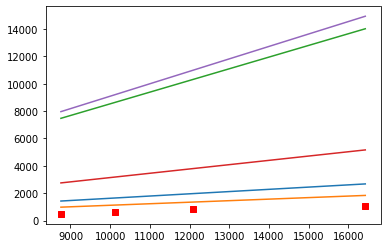

In [6]:
plt.scatter(x_data,y_data,color='r',marker='s')
for y_hat in y_hat_list:
    plt.plot(x_data,y_hat)
    
plt.show()

In [7]:
import pandas as pd

In [8]:
df = pd.read_excel("./data/slr06.xls",separator=',')
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [9]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values
raw_X, y

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40],
        [ 57],
        [ 23],
        [ 14],
        [ 45],
        [ 10],
        [  5],
        [ 48],
        [ 11],
        [ 23],
        [  7],
        [  2],
        [ 24],
        [  6],
        [  3],
        [ 23],
        [  6],
        [  9],
        [  9],
        [  3],
        [ 29],
        [  7],
        [  4],
        [ 20],
        [  7],
        [  4],
        [  0],
        [ 25],
        [  6],
        [  5],
        [ 22],
        [ 11],
        [ 61],
        [ 12],
        [  4],
        [ 16],
        [ 13],
        [ 60],
        [ 41],
        [ 37],
        [ 55],
        [ 41],
        [ 11],
        [ 27],
        [  8],
        [  3],
        [ 17],
        [ 13],
        [ 13],
        [ 15],
        [  8],
        [ 29],
        [ 30],
        [ 24],
        [  9],
        [ 31],
        [ 14],
        [ 53],
        [ 26]], dtype=int64),
 array([392.5,  46.2,  15.7, 422.2, 119.

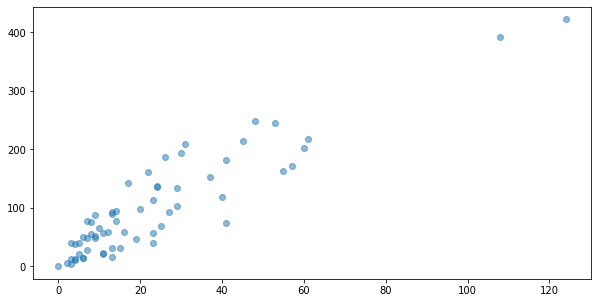

In [10]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)

In [12]:
np.ones((len(raw_X),1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [14]:
X=np.concatenate( (np.ones((len(raw_X),1)), raw_X), axis=1)
X

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.],
       [  1.,  57.],
       [  1.,  23.],
       [  1.,  14.],
       [  1.,  45.],
       [  1.,  10.],
       [  1.,   5.],
       [  1.,  48.],
       [  1.,  11.],
       [  1.,  23.],
       [  1.,   7.],
       [  1.,   2.],
       [  1.,  24.],
       [  1.,   6.],
       [  1.,   3.],
       [  1.,  23.],
       [  1.,   6.],
       [  1.,   9.],
       [  1.,   9.],
       [  1.,   3.],
       [  1.,  29.],
       [  1.,   7.],
       [  1.,   4.],
       [  1.,  20.],
       [  1.,   7.],
       [  1.,   4.],
       [  1.,   0.],
       [  1.,  25.],
       [  1.,   6.],
       [  1.,   5.],
       [  1.,  22.],
       [  1.,  11.],
       [  1.,  61.],
       [  1.,  12.],
       [  1.,   4.],
       [  1.,  16.],
       [  1.,  13.],
       [  1.,  60.],
       [  1.,  41.],
       [  1.,  37.],
       [  1.,  55.],
       [  1.,  41.],
       [  1.,  11.],
       [  1.,

In [16]:
w=np.random.normal((2,1))
w

array([2.74036257, 0.21661676])

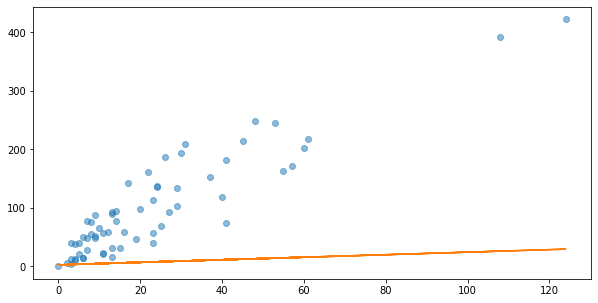

In [19]:
plt.figure(figsize=(10,5))

y_predict=np.dot(X, w)
plt.plot(raw_X,y, 'o', alpha=0.5)
plt.plot(raw_X,y_predict)

In [20]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [21]:
hypothesis_function(X,w)[:5]

array([26.13497213,  6.85608092,  5.55638039, 29.60084021, 11.40503278])

In [22]:
def cost_function(h,y):
    return (1/(2*len(y)))*np.sum((h-y)**2)

In [26]:
h=hypothesis_function(X,w)
cost_function(h,y)

7462.065527579351

In [27]:

def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

In [28]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.88500654  3.41618748]
cost: 625.3739950799951


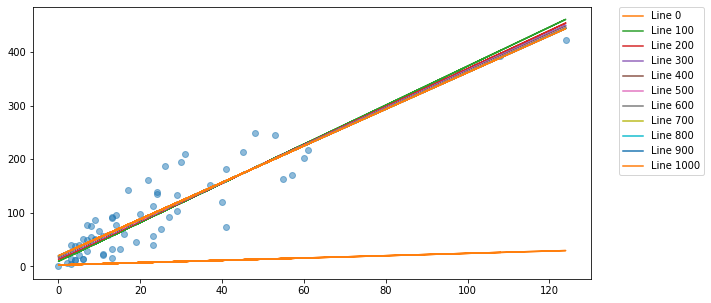

In [46]:
plt.figure(figsize=(10,5))
y_predict_step= np.dot(X, np.array(theta_list).T) # list를 np.array로 변환시켜서 Transpose

plt.plot(raw_X,y,"o", alpha=0.5)
for i in range (0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [51]:
th0 = np.array(theta_list)[:,0]
th1 = np.array(theta_list)[:,1]
TH0, TH1 = np.meshgrid(th0, th1)
TH0, TH1

(array([[ 2.74036257,  2.83084796,  2.91266563, ..., 19.88338962,
         19.88394986, 19.88450727],
        [ 2.74036257,  2.83084796,  2.91266563, ..., 19.88338962,
         19.88394986, 19.88450727],
        [ 2.74036257,  2.83084796,  2.91266563, ..., 19.88338962,
         19.88394986, 19.88450727],
        ...,
        [ 2.74036257,  2.83084796,  2.91266563, ..., 19.88338962,
         19.88394986, 19.88450727],
        [ 2.74036257,  2.83084796,  2.91266563, ..., 19.88338962,
         19.88394986, 19.88450727],
        [ 2.74036257,  2.83084796,  2.91266563, ..., 19.88338962,
         19.88394986, 19.88450727]]),
 array([[0.21661676, 0.21661676, 0.21661676, ..., 0.21661676, 0.21661676,
         0.21661676],
        [4.00496825, 4.00496825, 4.00496825, ..., 4.00496825, 4.00496825,
         4.00496825],
        [3.78266057, 3.78266057, 3.78266057, ..., 3.78266057, 3.78266057,
         3.78266057],
        ...,
        [3.41622239, 3.41622239, 3.41622239, ..., 3.41622239, 3.41622239

In [52]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

<a list of 7 text.Text objects>

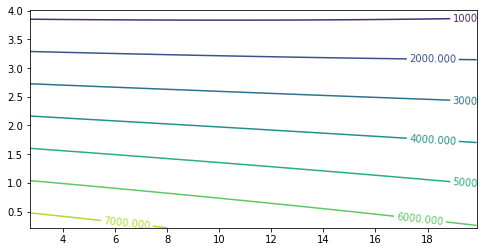

In [53]:
plt.figure(figsize=(8,4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10,inline_spacing=2)

In [54]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([ cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  """


TypeError: list indices must be integers or slices, not tuple

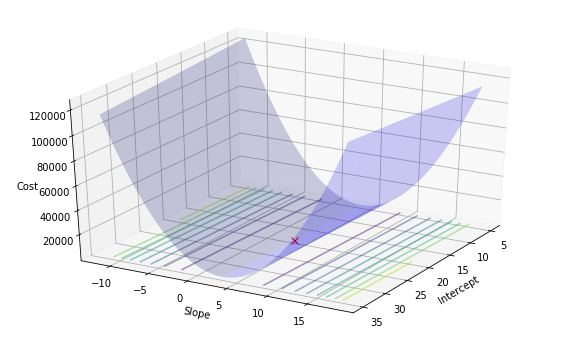

In [57]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost') 
ax.view_init(elev=30., azim=30)
ax.plot([np.array(theta)[0]], [np.array(theta)[1]], [cost_list[-1]] , markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7);

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', 
                markersize=1);
ax.plot(theta_list[:,0], theta_list[:,1], 0 , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2);

In [58]:
from sklearn.datasets import load_boston

In [62]:
boston=load_boston()

x_data=boston.data
y_data=boston.target.reshape(boston.target.size,1)

In [64]:
from sklearn import preprocessing

minmax_scale=preprocessing.MinMaxScaler().fit(x_data)
x_scaled_data=minmax_scale.transform(x_data)

x_scaled_data

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_scaled_data, y_data, test_size=0.33)

In [67]:
X_train.shape

(339, 13)

In [68]:
from sklearn import linear_model

regr=linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
regr.fit(X_train, y_train)
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
regr.coef_ , regr.intercept_

(array([[ -8.17953814,   4.56141585,   1.0643178 ,   2.54293183,
          -7.98199375,  19.91966564,  -1.54073781, -14.91278035,
           7.33317857,  -7.55603396,  -9.16227081,   3.44882903,
         -15.78553998]]),
 array([26.63168101]))

In [71]:
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [[ -8.17953814   4.56141585   1.0643178    2.54293183  -7.98199375
   19.91966564  -1.54073781 -14.91278035   7.33317857  -7.55603396
   -9.16227081   3.44882903 -15.78553998]]
intercept:  [26.63168101]


In [72]:
regr.predict(x_data[:5])


array([[-1002.83520544],
       [ -789.96571611],
       [ -680.69441978],
       [ -508.71341383],
       [ -548.88620538]])

In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [74]:
y_true = y_test
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)


(0.7276412805089236, 3.4689399654502, 27.725967836641765)

In [1]:
y_true = y_train
y_hat = regr.predict(X_train)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

NameError: name 'y_train' is not defined